In [19]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

* **Problema de Distribuição de Calor em uma Placa Metálica:**

Imagine uma placa metálica quadrada de tamanho 5x5 unidades em um sistema bidimensional. Queremos determinar a distribuição de temperatura na placa ao longo do tempo, considerando as condições iniciais e as fronteiras. Suponha que a placa seja aquecida em seu centro e resfriada nas bordas, criando uma situação de difusão de calor.

* **Formulação do Problema:**

A temperatura em qualquer ponto da placa pode ser modelada como uma função do tempo e das coordenadas espaciais (x, y). O problema pode ser formulado da seguinte maneira:

A placa está inicialmente em equilíbrio térmico com uma temperatura uniforme, exceto no centro, onde a temperatura é maior (por exemplo, T = 100°C).
As bordas da placa são mantidas a uma temperatura constante e menor (por exemplo, T = 0°C).
A temperatura em qualquer ponto no interior da placa pode ser calculada usando a equação da difusão do calor, que depende da temperatura nos pontos vizinhos.
Queremos simular a evolução da distribuição de temperatura ao longo do tempo.
Valores Arbitrários:

* **Aqui estão alguns valores arbitrários para as variáveis do problema:**

Tamanho da placa: 5 unidades x 5 unidades (ou seja, uma matriz 5x5).
Temperatura inicial da placa (exceto no centro): 20°C.
Temperatura inicial no centro da placa: 100°C.
Temperatura nas bordas da placa (condições de contorno): 0°C.
Coeficiente de difusão térmica: D = 0,1 m²/s (valor arbitrário).
A tarefa é criar um programa Python que utilize o método de Gauss-Seidel para resolver numericamente a distribuição de temperatura na placa ao longo do tempo. O método de Gauss-Seidel é uma técnica iterativa que atualiza a temperatura em cada ponto da placa com base na temperatura em seus pontos vizinhos, repetindo o processo até que a distribuição de temperatura convirja para um estado estável ou até um determinado ponto no tempo.

A simulação resultante mostrará como a temperatura evolui na placa, começando a partir das condições iniciais especificadas e seguindo as leis da difusão de calor. Essa simulação pode ser usada para entender como a temperatura muda em objetos complexos e pode ser aplicada a problemas reais de transferência de calor em engenharia e física.

----------------------------------------------------------------------------------------------------------------

In [20]:
def gaussseidel(AB,ER,X0):
    ''' Função que realiza o cálculo de um sistema linear através do método de iterativo de Gauss-Seidel.
    
    Sinopse:
         X = gaussseidel(AB,ER,X0)
    
    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear
         ER - Erro relativo (forma decimal) entre a iteração i e a iteração i-1
         X0 - Vetor estimativa inicial da solução
     
    Saídas:
         X - Vetor solução do sistema linear
         
         @ney
    '''
    
    A = AB[:,0:-1]
    B = AB[:,-1]
    X = X0
    erro = 1
    
    while (erro > ER):
        Xp = np.copy(X)
        for i in range(len(A)):
            s = 0
            for j in range(len(A)):
                if (i != j):
                    s += A[i,j]*X[j]
            X[i] = (B[i] - s)/A[i,i]
        EA = np.absolute(X - Xp)
        Emax = np.amax(EA)
        idx = np.where(EA == Emax)
        
        if (len(idx[0]) > 1):
            erro = np.absolute(EA[idx[0][0]]/X[idx[0][0]])
        else:
            erro = np.absolute(EA[idx[0]]/X[idx[0]])
    
    X = np.around(X, decimals=3)
    
    return X


In [21]:
# Parâmetros
Lx, Ly = 5.0, 5.0  # Tamanho da placa
Nx, Ny = 5, 5      # Número de pontos na placa
D = 0.1            # Coeficiente de difusão térmica
delta_t = 0.01     # Intervalo de tempo
num_iteracoes = 100

# Discretização
delta_x = Lx / (Nx - 1)
delta_y = Ly / (Ny - 1)
T = np.zeros((Nx, Ny))  # Inicialização da temperatura em todos os pontos

# Condições iniciais
T[Nx // 2, Ny // 2] = 100.0  # Temperatura inicial no centro

# Matriz aumentada para o sistema linear
AB = np.zeros((Nx * Ny, Nx * Ny + 1))
Xs = np.arange(Nx * Ny).reshape(Nx, Ny)

for i in range(Nx):
    for j in range(Ny):
        idx = i * Nx + j
        AB[idx, idx] = -4 * D / (delta_x ** 2) - 4 * D / (delta_y ** 2)
        if i > 0:
            AB[idx, Xs[i - 1, j]] = D / (delta_x ** 2)
        if i < Nx - 1:
            AB[idx, Xs[i + 1, j]] = D / (delta_x ** 2)
        if j > 0:
            AB[idx, Xs[i, j - 1]] = D / (delta_y ** 2)
        if j < Ny - 1:
            AB[idx, Xs[i, j + 1]] = D / (delta_y ** 2)
        AB[idx, -1] = -T[i, j]

X0 = np.zeros(Nx * Ny)
ER = 1e-6  
solucao = gaussseidel(AB, ER, X0)
solucao = solucao.reshape(Nx, Ny)

print("Distribuição de Temperatura na Placa:")
for i in range(Nx):
    for j in range(Ny):
        print(f'T{i}{j} = {solucao[i, j]:.3f}', end='\t')
    print()


Distribuição de Temperatura na Placa:
T00 = 0.369	T01 = 1.478	T02 = 3.941	T03 = 1.478	T04 = 0.369	
T10 = 1.478	T11 = 7.512	T12 = 28.570	T13 = 7.512	T14 = 1.478	
T20 = 3.941	T21 = 28.570	T22 = 209.598	T23 = 28.570	T24 = 3.941	
T30 = 1.478	T31 = 7.512	T32 = 28.570	T33 = 7.512	T34 = 1.478	
T40 = 0.369	T41 = 1.478	T42 = 3.941	T43 = 1.478	T44 = 0.369	


Text(0.5, 1.0, 'Distribuição de Temperatura na Placa (Geral)')

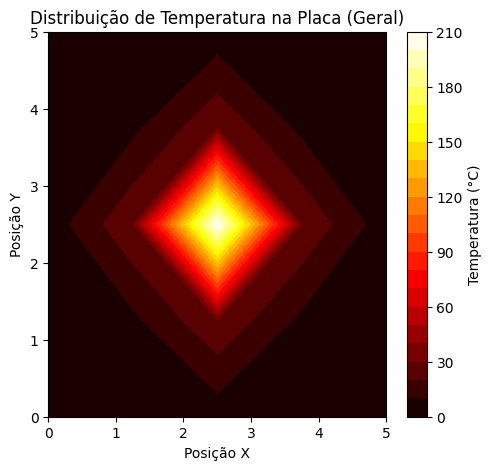

In [22]:
# Criar grades para plotagem
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Plotagem da distribuição de temperatura geral
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(X, Y, solucao, cmap='hot', levels=20)
plt.colorbar(label='Temperatura (°C)')
plt.xlabel('Posição X')
plt.ylabel('Posição Y')
plt.title('Distribuição de Temperatura na Placa (Geral)')